In [1]:
using CSV, DataFrames
using CairoMakie

In [2]:
region="romania"
magnitude_threshold = 0.0;

## Par dep article ready plots

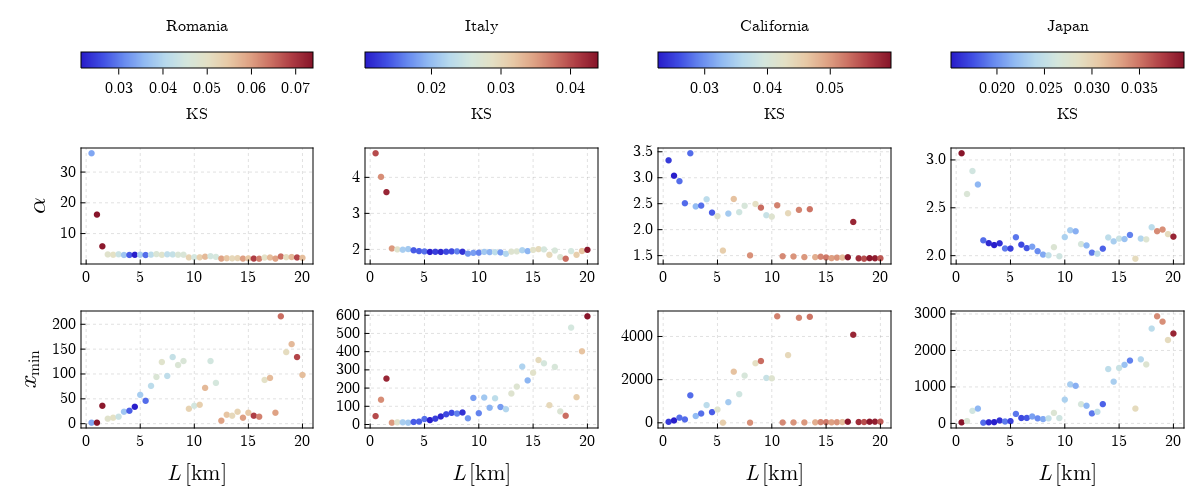

In [5]:
region="romania"
magnitude_threshold = 0.0;
results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame);

# This is inefficient, should use makie layouts. Maybe sometimes later

# Set global latex font
set_theme!(Theme(fonts=(; regular="CMU Serif")))
# Color gradient
# custom_cgrad = cgrad([:blue , :red],[0.2,0.6])
cmap = :thermometer

# Initialize figure
fig = Figure(resolution = (1200, 500), font= "CMU Serif", title ="Romania") ## probably you need to install this font in your system
# y labels, just for left figure. x labels
xlabels = ["","", L"L\,\text{[km]}"]
ylabels = ["",L"\alpha", L"x_{\mathrm{min}}"]

# First column figure
ax = [Axis(fig[i, 1], xlabel = xlabels[i], ylabel = ylabels[i], ylabelsize = 26,
    xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
    xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10) for i in 2:3]
sc = scatter!(ax[1],results.cell_size, results.alpha; color = results.KS, colormap = cmap, 
    markersize = 9, marker = :circle, strokewidth = 0)
xmin_scat = scatter!(ax[2],results.cell_size, results.xmin; color = results.KS, colormap = cmap, 
    markersize = 9, marker = :circle, strokewidth = 0)
cbar = Colorbar(fig[1,1], xmin_scat, vertical = false, label="KS", flipaxis=false)
Label(fig[1, 1, Top()], "Romania", fontsize=16,
        padding=(0, 0, 15, 0))

# Columns 2,3,4 figures
for (j,region,title) in zip(2:4,[ "italy", "california", "japan"],["Italy", "California", "Japan"])
    results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame);
    # Just x label
    xlabels = ["","", L"L\,\text{[km]}"]
    ax = [Axis(fig[i, j], xlabel = xlabels[i], ylabelsize = 26,
        xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
        xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10) for i in 2:3]
    sc = scatter!(ax[1],results.cell_size, results.alpha; color = results.KS, colormap = cmap, 
        markersize = 9, marker = :circle, strokewidth = 0)
    xmin_scat = scatter!(ax[2],results.cell_size, results.xmin; color = results.KS, colormap = cmap, 
        markersize = 9, marker = :circle, strokewidth = 0)
    cbar = Colorbar(fig[1,j], xmin_scat, vertical = false, label="KS", flipaxis=false)
    Label(fig[1, j, Top()], title, fontsize=16,
        padding=(0, 0, 15, 0))
end


save("./results/all_regions_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size_goodness_fit.png", fig, px_per_unit=5)
save("./results/all_regions_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size_goodness_fit.pdf", fig)


fig

## Parameter dependency Analysis

In [ ]:
region="romania"
magnitude_threshold = 0.0;

In [38]:
# Analysis of parameter dependency. Based on minimum KS, proper alpha and minimum xmin
function parameter_dependency_analysis(region; magnitude_threshold=0.0)
    results = CSV.read("./results/$region/$(region)_minmag_$(magnitude_threshold)_alpha_xmin_dependency_cell_size.csv", DataFrame);

    # Eliminate records if alpha is not in range [1.5,3.5]

    results_filter_alpha = results[(results.alpha .> 1.7) .& (results.alpha .< 3.2), :];

    # Sort by KS and keep first 10 only
    results_sorted_KS = sort!(results_filter_alpha, [:KS])
    results_filter_alpha_sorted_KS = first(results_sorted_KS, 10)

    # Sort by xmin and keep first 7 only
    results_filter_alpha_sorted_KS_sorted_xmin = sort!(results_filter_alpha_sorted_KS, [:xmin])
    best_fits_region = first(results_filter_alpha_sorted_KS_sorted_xmin, 7) 
    return(best_fits_region)
end




parameter_dependency_analysis (generic function with 1 method)

In [39]:
###########################################################################################################################

df = DataFrame([[0,0,0,0,0,0,0]],["par_dep"])
for region in ["romania","california","italy","japan"]
    par_dep_best_fits = DataFrame([[0,0,0,0,0,0,0]],[region])
    best_fits = parameter_dependency_analysis(region)
    par_dep_best_fits = hcat(par_dep_best_fits, best_fits)
    df = hcat(df, par_dep_best_fits, makeunique=true)
end

###########################################################################################################################

In [40]:
df

Row,par_dep,romania,cell_size,alpha,xmin,KS,california,cell_size_1,alpha_1,xmin_1,KS_1,italy,cell_size_2,alpha_2,xmin_2,KS_2,japan,cell_size_3,alpha_3,xmin_3,KS_3
,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64
1,0,0,3.5,3.02817,24.0,0.03748,0,1.0,3.03866,108.0,0.0225605,0,4.0,1.9747,14.0,0.0140652,0,2.5,2.15997,20.0,0.0184474
2,0,0,4.0,3.03649,26.0,0.027346,0,2.0,2.50847,156.0,0.027515,0,4.5,1.95191,16.0,0.01416,0,3.0,2.13042,30.0,0.0156549
3,0,0,4.5,3.08578,34.0,0.0214693,0,1.5,2.93319,238.0,0.0276943,0,5.5,1.92878,24.0,0.0104374,0,3.5,2.1105,34.0,0.0151645
4,0,0,10.0,2.29816,36.0,0.0450462,0,3.0,2.44654,314.0,0.0327554,0,5.0,1.94258,30.0,0.0151428,0,5.0,2.07403,62.0,0.0166223
5,0,0,5.5,3.01461,46.0,0.0286123,0,3.5,2.46298,430.0,0.0277091,0,6.0,1.93309,32.0,0.0123827,0,4.0,2.12911,80.0,0.0159554
6,0,0,5.0,3.11,58.0,0.0384508,0,4.5,2.32777,494.0,0.0266581,0,6.5,1.9286,44.0,0.0109506,0,6.0,2.11465,148.0,0.017038
7,0,0,6.0,3.13416,76.0,0.041155,0,4.0,2.5846,820.0,0.0365082,0,7.0,1.93482,56.0,0.0130251,0,6.5,2.0788,150.0,0.0176586
